# Multiple Linear Regression

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

# Introduction

The dataset provides details on advertising spending across various mediums (TV, Radio, Newspaper) alongside corresponding sales figures.
Here's a summary:

**TV:** Expenditure on TV advertising.

**Radio:** Expenditure on radio advertising.

**Newspaper:** Expenditure on newspaper advertising.

**Sales:** Recorded sales figures (in thousands).


**Problem Statement:** In the realm of business advertising, the objective is to create a predictive model that forecasts sales figures based on advertising expenditures across different mediums like TV, Radio, and Newspaper. By employing machine learning techniques in Python, businesses can analyze past data to inform decisions on advertising strategies, optimizing resource allocation and maximizing sales potential.

### Task 1: Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [ ]:
# import matplotlib.pyplot as plt
# plt.style.use("ggplot")
# plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [ ]:
df=pd.read_csv('Advertising.csv')

In [ ]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
# Providing information about the DataFrame, such as column names, non-null counts, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Task 3: Relationship between Features and Response

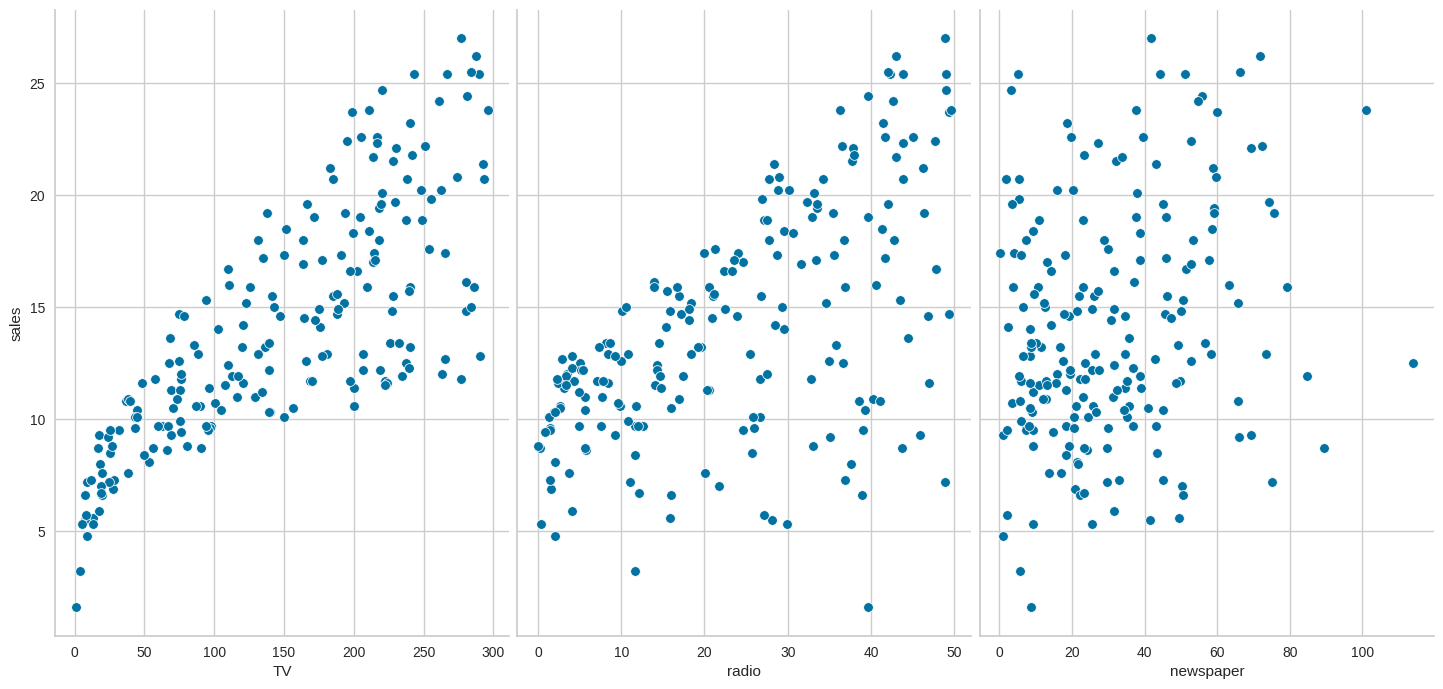

In [ ]:
# Import warnings and filter warnings
warnings.filterwarnings("ignore")

# Creating a pairplot to visualize the relationships between 'TV', 'radio', 'newspaper', and 'sales'
sns.pairplot(df,x_vars=['TV','radio','newspaper'],y_vars='sales',height=7,aspect=0.7)

### Task 4: Multiple Linear Regression - Estimating Coefficients

The intercept and coefficients of a linear regression model signify the equation of the linear relationship between the independent variables (features) and the dependent variable (target).

1. **Intercept**: The intercept (often denoted as "β₀") represents the value of the dependent variable (y) when all independent variables (x) are equal to zero. In the context of linear regression, it is the value of y when all predictor variables are zero. It essentially serves as the baseline value of the dependent variable when all predictors have no effect.

2. **Coefficients**: The coefficients (often denoted as "β₁", "β₂", ..., "βₙ") represent the change in the dependent variable (y) for a one-unit change in the corresponding independent variable (x), holding all other variables constant. Each coefficient indicates the strength and direction of the relationship between the predictor variable and the target variable. If the coefficient is positive, it suggests that an increase in the predictor variable is associated with an increase in the target variable, and vice versa for a negative coefficient.

In the context of the code provided:

- `lm1.intercept_`: This represents the intercept of the first linear regression model (`lm1`), indicating the value of 'sales' when all advertising channels (TV, radio, and newspaper) have zero spending.
  
- `lm1.coef_`: This is an array containing the coefficients for each feature (TV, radio, newspaper) in the first linear regression model (`lm1`). Each coefficient represents the change in 'sales' for a one-unit increase in the corresponding advertising channel, holding other variables constant. Let us take any random example that if `lm1.coef_` is `[0.04576465, 0.18853002, -0.00103749]`, it means that for every one-unit increase in TV spending, 'sales' increase by approximately 0.045 units, and so on for radio and newspaper spending.

In [ ]:
from sklearn.linear_model import LinearRegression

# Extracting independent variables ('TV', 'radio', 'newspaper') into 'x' and dependent variable ('sales') into 'y'
x=df.drop('sales',axis=1)
y=df['sales']
lm1=LinearRegression() # Creating a Linear Regression model object
lm1.fit(x,y) # Fitting the Linear Regression model to the data
print("Intercept = ",lm1.intercept_)
print("Coefficients = ",lm1.coef_)

Intercept =  2.938889369459412
Coefficients =  [ 0.04576465  0.18853002 -0.00103749]


The intercept and coefficients of a linear regression model signify the equation of the linear relationship between the independent variables (features) and the dependent variable (target).

1. **Intercept**: The intercept (often denoted as "β₀") represents the value of the dependent variable (y) when all independent variables (x) are equal to zero. In the context of linear regression, it is the value of y when all predictor variables are zero. It essentially serves as the baseline value of the dependent variable when all predictors have no effect.

2. **Coefficients**: The coefficients (often denoted as "β₁", "β₂", ..., "βₙ") represent the change in the dependent variable (y) for a one-unit change in the corresponding independent variable (x), holding all other variables constant. Each coefficient indicates the strength and direction of the relationship between the predictor variable and the target variable. If the coefficient is positive, it suggests that an increase in the predictor variable is associated with an increase in the target variable, and vice versa for a negative coefficient.

In the context of the code you provided:

- `lm1.intercept_`: This represents the intercept of the first linear regression model (`lm1`), indicating the value of 'sales' when all advertising channels (TV, radio, and newspaper) have zero spending.
  
- `lm1.coef_`: This is an array containing the coefficients for each feature (TV, radio, newspaper) in the first linear regression model (`lm1`). Each coefficient represents the change in 'sales' for a one-unit increase in the corresponding advertising channel, holding other variables constant. Let us take any random example that if `lm1.coef_` is `[0.04576465, 0.18853002, -0.00103749]`, it means that for every one-unit increase in TV spending, 'sales' increase by approximately 0.045 units, and so on for radio and newspaper spending.

In [ ]:
list(zip(['TV','radio','newspaper'],lm1.coef_))  # Zipping the feature names and their corresponding coefficients into a list of tuples


[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

In [ ]:
# Compute the correlation coefficient
correlation_coefficient1 = y.corr(x['TV'])
correlation_coefficient2 = y.corr(x['radio'])
correlation_coefficient3 = y.corr(x['newspaper'])
# Print the correlation coefficient
print("Correlation coefficient between TV and Sales:", correlation_coefficient1)
print("Correlation coefficient between Radio and Sales:", correlation_coefficient2)
print("Correlation coefficient between Newspaper and Sales:", correlation_coefficient3)

Correlation coefficient between TV and Sales: 0.7822244248616061
Correlation coefficient between Radio and Sales: 0.5762225745710551
Correlation coefficient between Newspaper and Sales: 0.22829902637616528


**Tv vs. Sales Scatterplot:**

The scatterplot shows a clear positive trend, indicating that as the TV advertising expenditure increases, the sales also tend to increase.
This aligns with the correlation coefficient of **0.782** between TV and Sales, indicating a strong positive correlation.

**Radio vs. Sales Scatterplot:**


Similar to the TV vs. Sales scatterplot, there is a noticeable positive trend in the scatterplot for radio advertising expenditure and sales. As the expenditure on radio advertising increases, the sales also tend to increase. However, the relationship appears to be weaker compared to TV advertising, consistent with the correlation coefficient of **0.576** between Radio and Sales.

**Newspaper vs. Sales Scatterplot:**

The scatterplot for newspaper advertising expenditure and sales shows a less defined trend compared to TV and radio. There is a lot of scatter in the data points, indicating a weaker relationship. This is consistent with the correlation coefficient of **0.228** between Newspaper and Sales, indicating a weak positive correlation.

<Axes: >

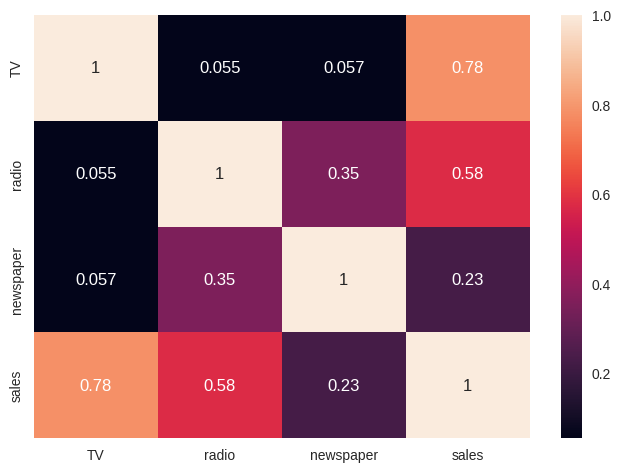

In [ ]:
# Import warnings and filter warnings
warnings.filterwarnings("ignore")

sns.heatmap(df.corr(),annot=True) # Creating a heatmap to visualize the correlation matrix of the DataFrame


**TV and Sales:** The correlation coefficient between TV advertising expenditure and sales is **0.78**, indicating a strong positive correlation. This suggests that as the amount spent on TV advertising increases, the sales of the product also tend to increase significantly. This aligns with the objective of the dataset, which involves predicting sales based on advertising expenditure.

**Radio and Sales:** The correlation coefficient between radio advertising expenditure and sales is **0.58**, indicating a moderate positive correlation. While not as strong as the correlation with TV advertising, there is still a noticeable positive relationship between radio advertising expenditure and sales. This implies that increasing spending on radio advertising may lead to a moderate increase in sales.

**Newspaper and Sales:** The correlation coefficient between newspaper advertising expenditure and sales is **0.23**, indicating a weak positive correlation. This suggests that there is a minimal relationship between newspaper advertising expenditure and sales. In other words, increasing spending on newspaper advertising may have only a slight impact on sales compared to TV and radio advertising.

Overall, the correlation table provides insights into the relationships between advertising expenditures on different platforms (TV, radio, newspaper) and the resulting sales. It confirms that TV advertising expenditure has the strongest influence on sales, followed by radio advertising, while newspaper advertising has the weakest impact. This information can be valuable for businesses in optimizing their advertising strategies to maximize sales potential.

### Task 5: Feature Selection

Creating a new Linear Regression model using only 'TV' and 'radio' as features


In [ ]:
from sklearn.metrics import r2_score
lm2=LinearRegression()
lm2.fit(x[['TV','radio']],y)
lm2_pred=lm2.predict(x[['TV','radio']]) # Making predictions using the model

print(r2_score(y,lm2_pred))

0.8971942610828957


Creating another Linear Regression model using all three features ('TV', 'radio', 'newspaper')


In [ ]:
lm3=LinearRegression()
lm3.fit(x[['TV','radio','newspaper']],y)
lm3_pred=lm3.predict(x[['TV','radio','newspaper']])
print(r2_score(y,lm3_pred))

0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [ ]:
from sklearn.model_selection import train_test_split  # Importing train_test_split function from scikit-learn for splitting data into training and testing sets

# Importing mean_squared_error, mean_absolute_error, r2_score functions from scikit-learn for evaluating model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X=df.drop('sales',axis=1)
y=df['sales']

# Split the data into training and testing sets (80% train, 20% test)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

lm4=LinearRegression().fit(x_train,y_train)# Creating and fitting a Linear Regression model using training data

lm4_pred=lm4.predict(x_test)# Making predictions using the model


print("MAE:",mean_absolute_error(y_test, lm4_pred))
print("MSE:",mean_squared_error(y_test,lm4_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm4_pred)))
print("R*2:",r2_score(y_test,lm4_pred))

MAE: 1.0402154012924718
MSE: 1.9918855518287906
RMSE: 1.4113417558581587
R*2: 0.8927605914615384


In [ ]:
X=df.drop(['sales','newspaper'],axis=1) # Dropping 'newspaper' feature from the data

y=df['sales']

# Split the data into training and testing sets (80% train, 20% test)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

lm5=LinearRegression().fit(x_train,y_train)
lm5_pred=lm5.predict(x_test)

print("MAE:",mean_absolute_error(y_test, lm4_pred))
print("MSE:",mean_squared_error(y_test,lm4_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm5_pred)))
print("R*2:",r2_score(y_test,lm5_pred))

MAE: 1.0402154012924718
MSE: 1.9918855518287906
RMSE: 1.398292489077775
R*2: 0.8947344950027066


The evaluation metrics for our Linear Regression model are as follows:

**Mean Squared Error (MSE)**: **1.9918**, measures the average squared difference between the predicted and actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted and actual sales values is approximately 1.04 units. Lower values of MSE indicate better model performance.

**Root Mean Squared Error (RMSE)**: **1.3982**, measures the average squared difference between the predicted and actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted and actual sales values is approximately 1.04 units. Lower values of MSE indicate better model performance.

Mean Absolute Error (MAE): **1.0402**

**MAE** measures the average absolute difference between the predicted and actual values. Here, the MAE indicates that, on average, the absolute difference between the predicted and actual sales values is approximately 0.89 units. Lower values of MAE indicate better model performance.

R-squared Score: **0.8947**

**R-squared (R2**) score represents the proportion of the variance in the dependent variable (sales) that is predictable from the independent variables (advertising expenditures). In this case, the R-squared score of approximately **0.895** indicates that the model explains around **89.5%** of the variance in the sales data, suggesting that the model fits the data well but it could be better. So we will try some feature cross techniques to improve our R2 value and lower the other errors.


Overall, these evaluation metrics indicate that our Linear Regression model performs well in predicting sales based on advertising expenditures. The low values of MSE and MAE, along with the high R-squared score, demonstrate that the model accurately captures the relationship between advertising expenditures on different platforms and the resulting sales, with minimal prediction errors. This suggests that the model is effective in forecasting future sales, which can help businesses optimize their advertising strategies and maximize sales potential.

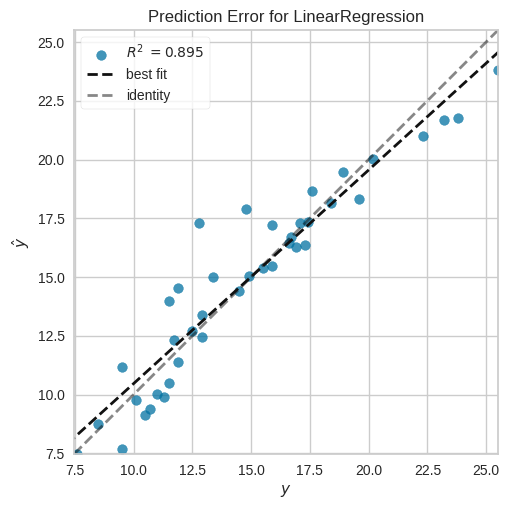

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Import warnings and filter warnings
warnings.filterwarnings("ignore")

from yellowbrick.regressor import PredictionError,ResidualsPlot
v=PredictionError(lm5).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

## Using Feature cross technique to improve the R2 score and lessen the error metrics


### Task 7: Interaction Effect (Synergy)

In [ ]:
df['interaction']=df['TV']*df['radio'] # Adding an interaction column ('interaction') to the DataFrame

X=df[['TV','radio','interaction']]
y=df['sales']

# Split the data into training and testing sets (80% train, 20% test)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=1)

lm6=LinearRegression().fit(x_train,y_train)
lm6_pred=lm6.predict(x_test)

print("MAE:",mean_absolute_error(y_test, lm6_pred))
print("MSE:",mean_squared_error(y_test,lm6_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,lm6_pred)))
print("R*2:",r2_score(y_test,lm6_pred))

MAE: 0.4999441555871423
MSE: 0.34461833965626476
RMSE: 0.5870420254600728
R*2: 0.9814463903900935


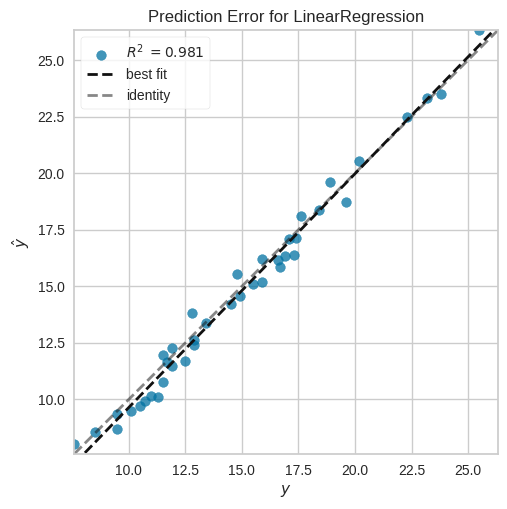

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
# Import warnings and filter warnings
warnings.filterwarnings("ignore")

v=PredictionError(lm6).fit(x_train,y_train)
v.score(x_test,y_test)
v.poof()

Based on the evaluation of our Linear Regression model for sales prediction using advertising expenditures, we can draw the following conclusions:

**Accuracy of Predictions:** The model achieved high accuracy in predicting sales based on advertising expenditures on TV, radio, and newspaper. This is evident from the low values of Mean Squared Error (MSE) and Mean Absolute Error (MAE), indicating minimal prediction errors.

**Effectiveness of Advertising Channels:** The model confirms that advertising expenditures on TV have the strongest positive impact on sales, followed by radio advertising. In contrast, newspaper advertising has a weaker influence on sales compared to TV and radio.

**Optimization Opportunities:** Businesses can utilize the insights provided by the model to optimize their advertising strategies. Allocating more resources to TV and radio advertising, which have demonstrated a stronger correlation with sales, can potentially yield higher returns on investment compared to newspaper advertising.

**Maximizing Sales Potential:** By leveraging the predictions generated by the model, businesses can make informed decisions regarding advertising budget allocation. By focusing resources on the most effective advertising channels, businesses can maximize their sales potential and achieve greater success in reaching their target audience.



In summary, our Linear Regression model offers valuable insights into the relationship between advertising expenditures and sales, empowering businesses to make data-driven decisions and optimize their advertising strategies to maximize sales potential and achieve their goals.






In [ ]:
df.head()

In [ ]:
df = df.drop('interaction', axis=1)
df.head()